### 分類期の精度指標

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

In [4]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

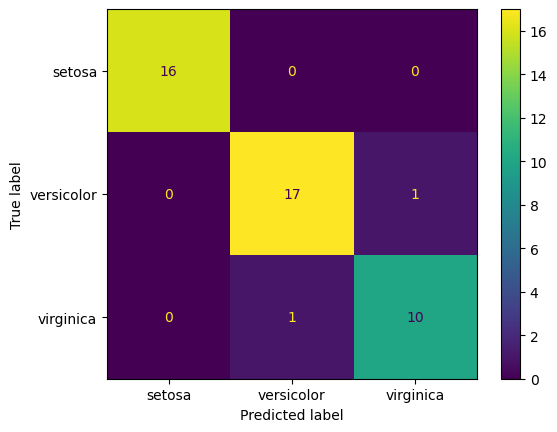

In [5]:
# 混合行列 覚えよう
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


### Accuracyを計算する

In [6]:
# サンプルデータ
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0 ,0, 1, 0, 1]

In [7]:
# Accuracy（正解率)
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5

### Precision



In [8]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)


0.6

### Recall TP/(TP + FN)　（よく出るし、医療系では必須かも）

In [9]:
# 陽性が極端に少ない場合の偏りのケースでも適切に評価できる場合がある

In [10]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.6

### Specificity(特異度) TN/(TN + FP)

In [11]:
# 陰性のデータに対してどれだけ陰性と予測できたか

In [12]:
print(np.array(y_true )!= 1) # 反対にした(true, false)
print(y_true)

[False False  True False  True  True False False]
[1, 1, 0, 1, 0, 0, 1, 1]


In [13]:
recall_score(np.array(y_true) != 1 , np.array(y_pred) != 1)

0.3333333333333333

### 他クラス評価におけるprecision

In [14]:
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

accuracyとprecisionのmicro平均は同じである

In [15]:
# avarage = none
print(precision_score(y_test, y_pred, average=None))
# avarage=macro
print(np.mean(precision_score(y_test, y_pred, average=None)))
print(precision_score(y_test, y_pred, average='macro'))
# avarage=micor
print(precision_score(y_test, y_pred, average='micro'))
print(accuracy_score(y_test, y_pred))
print(model.classes_)

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9511784511784511
0.9555555555555556
0.9555555555555556
['setosa' 'versicolor' 'virginica']


### Precision Recall Curve

In [16]:
df = pd.read_csv('heart_preprocessed.csv')

In [17]:
df

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,140,221,164,0.0,0,1,1,1,0,0,1,0,0,1,0,0,1,0
996,60,125,258,141,2.8,1,0,1,0,0,1,1,0,1,1,1,0,0,1
997,47,110,275,118,1.0,1,0,1,0,0,1,1,0,1,1,1,0,1,0
998,50,110,254,159,0.0,0,1,0,0,0,1,1,0,1,0,0,0,1,0


In [18]:
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [19]:
y_pred_proba[:10]

array([[0.49520599, 0.50479401],
       [0.28366796, 0.71633204],
       [0.99732492, 0.00267508],
       [0.06897627, 0.93102373],
       [0.47851446, 0.52148554],
       [0.99002333, 0.00997667],
       [0.66307829, 0.33692171],
       [0.79275374, 0.20724626],
       [0.3021321 , 0.6978679 ],
       [0.3021321 , 0.6978679 ]])

In [20]:
X_test[:10]

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
993,41,110,172,158,0.0,0,1,0,0,1,1,0,1,0,0,0,0,1
859,57,154,232,164,0.0,1,1,1,0,0,1,0,1,0,0,0,1,0
298,62,120,267,99,1.8,2,1,0,0,1,1,0,0,1,1,0,0,1
553,42,120,240,194,0.8,0,1,0,1,0,0,0,0,0,0,1,0,1
672,58,105,240,154,0.6,0,1,0,1,0,1,0,1,1,1,0,0,1
971,56,134,409,150,1.9,2,0,0,0,1,1,0,1,1,1,0,0,1
27,56,130,256,142,0.6,1,1,0,1,0,0,0,1,1,1,0,0,0
231,49,118,149,126,0.8,3,1,0,1,0,1,0,1,0,0,0,1,0
306,74,120,269,121,0.2,1,0,1,0,0,1,0,1,1,0,0,1,0
706,74,120,269,121,0.2,1,0,1,0,0,1,0,1,1,0,0,1,0


In [21]:
model.classes_

array([0, 1])

In [22]:
y_test

993    0
859    0
298    0
553    1
672    1
      ..
167    0
998    1
984    0
491    0
10     1
Name: target, Length: 300, dtype: int64

In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [24]:
print(precision[:5])
print(recall[:5])
print(thresholds[:5])

[0.48666667 0.48993289 0.49324324 0.49491525 0.49829352]
[1. 1. 1. 1. 1.]
[0.00035687 0.00129168 0.00157549 0.0017484  0.00201324]


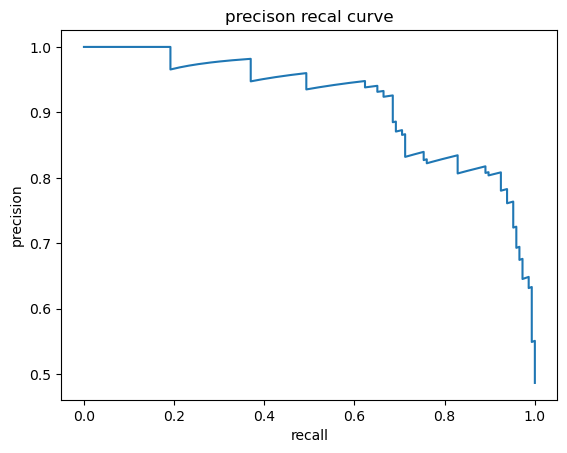

In [25]:
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precison recal curve')
plt.show()

### F値を計算する

In [26]:
from sklearn.metrics import f1_score
y_true = [1,0,0,1,0,0,1,1]
y_pred = [1,1,1,0,0,1,0,1]
f1_score(y_true,y_pred) 

0.4444444444444445

In [27]:
# 調和平均ver
from scipy.stats import hmean
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.4444444444444444

In [28]:
recall_score(y_true, y_pred)


0.5

In [29]:
precision_score(y_true, y_pred)

0.4

### 閾値に対してprecision, recall F値の推移を描画せよ

In [30]:
df = pd.read_csv('heart_preprocessed.csv')
df

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,140,221,164,0.0,0,1,1,1,0,0,1,0,0,1,0,0,1,0
996,60,125,258,141,2.8,1,0,1,0,0,1,1,0,1,1,1,0,0,1
997,47,110,275,118,1.0,1,0,1,0,0,1,1,0,1,1,1,0,1,0
998,50,110,254,159,0.0,0,1,0,0,0,1,1,0,1,0,0,0,1,0


In [31]:
# list(zip(precision, recall))

In [32]:
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築
model = LogisticRegression(solver='liblinear')
model.fit(X_test, y_test)
y_pred_proba = model.predict_proba(X_test)
y_pred_proba_pos = y_pred_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_pos)
# F値
f1_scores = [hmean([p, r]) for p, r in zip(precision, recall)]





### Threshholds vs Precision, recall Fscore

90th thesholds 0.8690095846645366


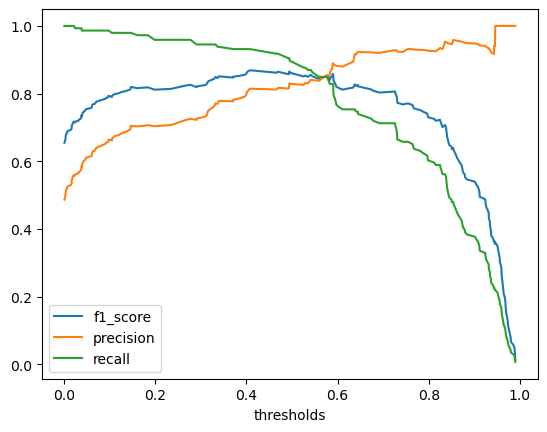

In [33]:
plt.plot(thresholds, f1_scores[:-1], label = 'f1_score')
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('thresholds')

plt.legend()
print(f'{np.argmax(f1_scores)}th thesholds {np.max(f1_scores)}')

In [34]:
np.argmax(f1_scores)

90

### ROCを描画する

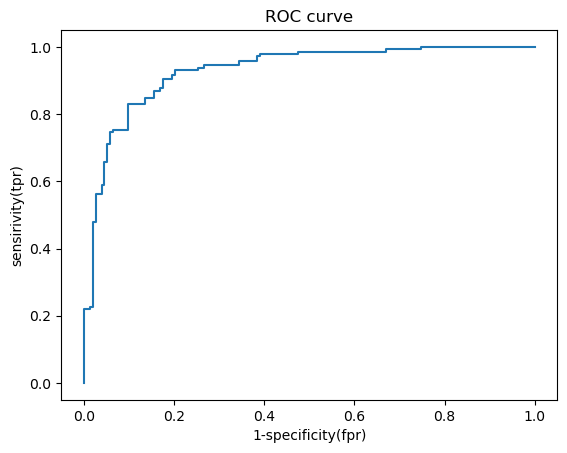

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, -1])

# 描画
plt.plot(fpr, tpr)
plt.xlabel('1-specificity(fpr)')
plt.ylabel('sensirivity(tpr)')
plt.title('ROC curve')
plt.show()

### AUC(Area Under the Curve)

In [45]:
from sklearn.metrics import auc
auc(fpr, tpr)
# 上の面積は0.93くらい
# ROCとAUCはよく使うので大事

0.9295054260807685

In [ ]:
# 多クラス分類の, ROCは飛ばす